<center>
    <h1>Systèmes intelligents et apprentissage machine</h1>
    <h2>ETS GTI770 (Eté 2018)</h2>
    <h2>Travaux Pratiques:  Rapport TP01</h2>
    <h4>Equipe 5 : Fabeleu Kouemo Carole, Illy Poulmanogo, Ouedraogo Thierry</h4>
</center>

## Introduction
Avec les liens fournis en l’annexe de cet énoncé et avec vos trouvailles faites sur Internet par le biais de vos recherches personnelles, faites, à titre d’introduction, une revue de la littérature. Celle-ci doit faire état des recherches ayant été faites en la matière et des possibles pistes que vous pourriez suivre durant ce laboratoire pour effectuer l’extraction de primitives sur les images de galaxies.

## I. Chargement des images et pré-traitements

### I.1. Chargement des données

Nous avons téléchargé le dataset fourni depuis Moodle pour ce TP. Nous fesons un chargement, en utilisant le fichier GTI770_label_data_set.csv, des 50 premières données de chaque classe. Toutes les images sont chargées dans une matrice (X) et les labels dans une matrice (Y). X a la forme (nombre d'image, nombre de canaux(RGB), hauteur, largeur) et Y la forme(nombre d'image, la classe).

In [73]:
import numpy as np
import os
import cv2

#Chargement du fichier CSV contenant le classement des images
csvFile = open("Dataset_GTI770\csv\GTI770_label_data_set.csv", "r")
#Definition de la matrice pour charger les 100 images (50 pour chacun des deux classes (smooth, spiral))
# Toutes les images de dataset sont de format (424, 424,3)
X = np.zeros((100, 424, 424,3))
#Y = np.array((100,10), dtype=object)
Y = np.zeros(100, dtype='object')
nombre_img_smooth = 0
nombre_img_spiral = 0
count = 0
#Parcourir le fichier CSV ligne par ligne
for i in csvFile :
    #Recuperation des valeurs de deux colonnes
    id, classe = i.split(",")
    #Sauter la ligne des attributs (meta-données)
    if id == "id":
        continue
    #Control de la limitation de la taille du dataset
    if "smooth" in classe and nombre_img_smooth < 50 : 
        #Construction du chemin de l'image correspondant l'id
        imagePath = 'Dataset_GTI770\images_training/' + id + '.jpg'
        #Verification de la validité du path de l'image
        if not os.path.exists(imagePath):
            print("Probleme de path du dataset d'images")
            break
        #Récuperation de l'image correspondant l'id
        img = cv2.imread(imagePath)
        #Ranger l'image dans la matrice
        X[count] = img
        Y[count] = classe
        nombre_img_smooth+=1
        count += 1
    if "spiral" in classe and nombre_img_spiral < 50: 
        #Construction du chemin de l'image correspondant l'id
        imagePath = 'Dataset_GTI770\images_training/' + id + '.jpg'
        #Verification de la validité du path de l'image
        if not os.path.exists(imagePath):
            print("Probleme de path du dataset d'images")
            break
        #Récuperation de l'image correspondant l'id
        img = cv2.imread(imagePath)
        #Ranger l'image dans la matrice
        X[count] = img
        Y[count] = classe
        nombre_img_spiral+=1
        count += 1
    if count >= 100 :
        break
print("Chargement du dataset terminé")
print("Nombre d'images : ", count)
print("Nombre d'images smooth : ", nombre_img_smooth)
print("Nombre d'images spiral : ", nombre_img_spiral)

print("Cellule executée avec succès")

Chargement du dataset terminé
Nombre d'images :  100
Nombre d'images smooth :  50
Nombre d'images spiral :  50
Cellule executée avec succès


### I.2. Vérification des données chargées
Nous affichons de manière aléatoire 2 images de chaque classe.

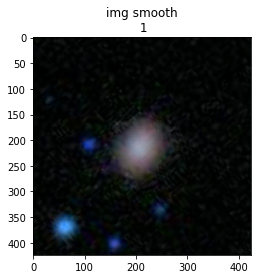

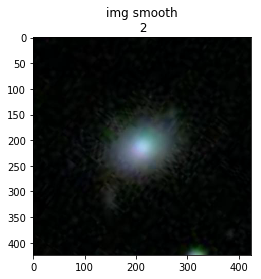

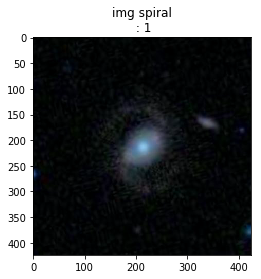

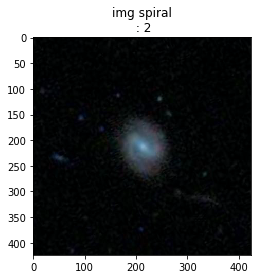

Cellule executée avec succès


In [74]:
import matplotlib.pyplot as plt
import random
# Selection aléatoire des 2 images de chaque classe
j = 0
k = 0
img_smooth_ids = np.zeros(50)
img_spiral_ids = np.zeros(50)
for i in range(100):
    if "smooth" in Y[i] :
        img_smooth_ids[j] = i
        j+=1
    if "spiral" in Y[i] :
        img_spiral_ids[k] = i
        k+=1
img_spiral_sample_ids = random.sample(list(img_spiral_ids),2)
img_smooth_sample_ids = random.sample(list(img_smooth_ids),2)

# Affichage des 2 images sélectionnés de chaque classe
numero = 1
for id in img_smooth_sample_ids :
    id = int (id)
    plt.imshow(X[id]/255)
    plt.title("img "+Y[id]+" "+str(numero))
    numero+=1
    plt.show()
numero = 1
for id in img_spiral_sample_ids :
    id = int (id)
    plt.imshow(X[id]/255)
    plt.title("img "+Y[id]+" : "+str(numero))
    numero+=1
    plt.show()

print("Cellule executée avec succès")

### I.3. Séparation des données d'apprentissage et des données de test
Nous fesons une séparation des données de la matrice X en 2 matrices avec un ratio de 70% (X_train) et 30% (X_test), ces 2 matrices doivent avoir le même nombre de classes. Nous faison la même chose pour (Y). Les données ont toujours les mêmes classes.

In [75]:
# Selection aléatoire de 35 images de chaque classe
img_spiral_train_sample_ids = random.sample(list(img_spiral_ids),35)
img_smooth_train_sample_ids = random.sample(list(img_smooth_ids),35)
# construction du X_train et Y_train de 70 images
X_train = np.zeros((70, 424, 424,3))
Y_train = np.zeros(70, dtype='object')
train_data_index = 0
for i in img_spiral_train_sample_ids :
    i = int(i)
    X_train[train_data_index] = X[i]
    Y_train[train_data_index] = Y[i]
    train_data_index+=1
    #print(""+Y[i]+""+str(train_data_index))
for i in img_smooth_train_sample_ids :
    i = int(i)
    X_train[train_data_index] = X[i]
    Y_train[train_data_index] = Y[i]
    train_data_index+=1
    #print(""+Y[i]+""+str(train_data_index))

# Selection des 30 images restantes de chaque classe
img_test_sample_ids = np.zeros(30)
#img_spiral_train_sample_ids
j = 0
#print(img_test_sample_ids)
for i in img_spiral_ids :
    if i not in img_spiral_train_sample_ids :
        img_test_sample_ids[j] = i
        #print(i)
        j+=1
for i in img_smooth_ids :
    if i not in img_smooth_train_sample_ids :
        img_test_sample_ids[j] = i
        #print(i)
        j+=1
#print(img_test_sample_ids)

# construction du X_test et Y_test de 30 images
X_test = np.zeros((30, 424, 424,3))
Y_test = np.zeros(30, dtype='object')
test_data_index = 0
for i in img_test_sample_ids :
    i = int(i)
    X_test[test_data_index] = X[i]
    Y_test[test_data_index] = Y[i]
    test_data_index+=1
    #print(""+Y[i]+""+str(test_data_index))

print("Dataset partionné en X_train, Y_train, X_test, Y_test")
print("Cellule executée avec succès")

Dataset partionné en X_train, Y_train, X_test, Y_test
Cellule executée avec succès


### I.4. Pré-traitements des données d'apprentissage
Pour éliminer certains bruits, notamment les étoiles lointaines dans l’arrière-plan, nous fesons un cropp de toutes  les images en utilisant le centre de l'image. La nouvelle dimension fait 50x50. Nous n'utilisons que numpy pour cela. Toutes les images croppées sont dans une matrice(X_train_crop)

In [76]:
# Definition d'une fonction qui cropp une image à partir du centre et selon les nouvelles tailles données
def cropper_centre(img, nouveauX, nouveauY):
    milieuX = img.shape[0]/2
    debutX = int(milieuX - nouveauX/2)
    finX = int(milieuX + nouveauX/2)
    milieuY = img.shape[1]/2
    debutY = int(milieuY - nouveauY/2)
    finY = int(milieuY + nouveauY/2)
    img = img[debutX:finX, debutY:finY, :]
    return img
#Teste de notre fonction avec une image, 100259.jpg
#imagePath = 'Dataset_GTI770\images_training/100259.jpg'
#img = cv2.imread(imagePath)
#plt.imshow(img)
#plt.show()
#print(img.shape)
#imgcrop = cropper_centre(img, 50, 50)
#print(imgcrop.shape)
#plt.imshow(imgcrop)
#plt.figure()


#Cropp de toutes les images dans X_train vers X_train_crop
X_train_crop = np.zeros((70, 100, 100,3))
X_train_crop_index = 0
for i in X_train:
    X_train_crop[X_train_crop_index] = cropper_centre(X_train[X_train_crop_index], 100, 100)
    X_train_crop_index+=1
    
# Definition X_train_crop_grayscale qui contient les images crooppé en GrayScale
X_Train_crop_grayScale = np.zeros((70, 100, 100))
X_train_crop_index = 0
for i in X_train_crop :
    img = X_train_crop[X_train_crop_index]
    img=img.astype(np.float32)
    X_Train_crop_grayScale [X_train_crop_index] = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
    X_train_crop_index+=1

print("Cellule executée avec succès")

Cellule executée avec succès


### I.5. Visualisation des données pré-traitées
Nous affichons une image de chaque catégorie avec le crop.

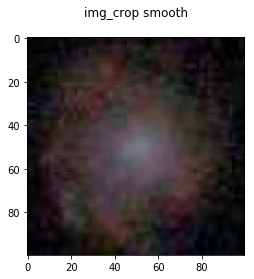

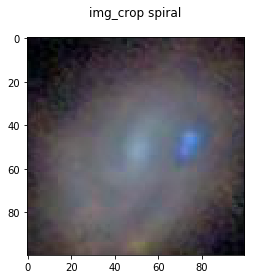

Cellule executée avec succès


In [77]:
X_train_crop_index = 0
nb_plt_smooth = 0
nb_plt_spiral = 0
for i in Y_train:
    if "smooth" in Y[X_train_crop_index] and nb_plt_smooth == 0:
        plt.imshow(X_train_crop[X_train_crop_index]/255)
        plt.title("img_crop "+Y[X_train_crop_index])
        plt.show()
        X_train_crop_index+=1
        nb_plt_smooth=1
    else :
        if "spiral" in Y[X_train_crop_index] and nb_plt_spiral == 0:
            plt.imshow(X_train_crop[X_train_crop_index]/255)
            plt.title("img_crop "+Y[X_train_crop_index])
            plt.show()
            X_train_crop_index+=1
            nb_plt_spiral=1
    if nb_plt_smooth == 0 and nb_plt_spiral == 0 :
        break
print("Cellule executée avec succès")

Nous affichons ici une image de chaque catégorie avec le crop et la transformation en grayscale.

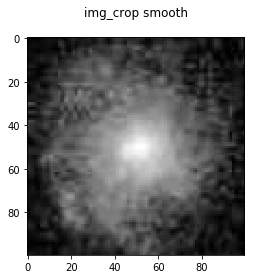

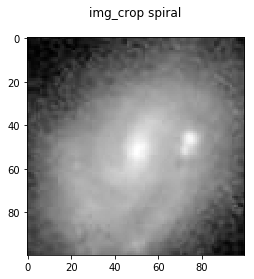

Cellule executée avec succès


In [78]:
X_train_crop_index = 0
nb_plt_smooth = 0
nb_plt_spiral = 0
for i in Y_train:
    if "smooth" in Y[X_train_crop_index] and nb_plt_smooth == 0:
        plt.imshow(X_Train_crop_grayScale[X_train_crop_index],"gray")
        plt.title("img_crop "+Y[X_train_crop_index])
        plt.show()
        X_train_crop_index+=1
        nb_plt_smooth=1
    else :
        if "spiral" in Y[X_train_crop_index] and nb_plt_spiral == 0:
            plt.imshow(X_Train_crop_grayScale[X_train_crop_index],"gray")
            plt.title("img_crop "+Y[X_train_crop_index])
            plt.show()
            X_train_crop_index+=1
            nb_plt_spiral=1
    if nb_plt_smooth == 0 and nb_plt_spiral == 0 :
        break
print("Cellule executée avec succès")

## II. Choix de primitives, extractions et évaluation

### II.1. Première primitive : Local Binary Patterns (LBP)


#### II.1.1. Choix de la primitive 
Explication de la primitive

#### II.1.2. Extraction de la primitive

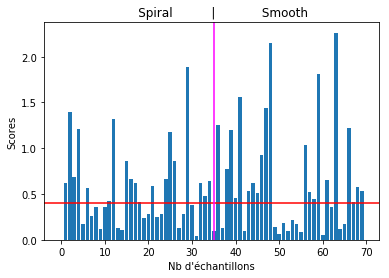

On constate que la majorité des images de la classe "spiral" on un
score inférieur à 0.4. Il s'agirat donc du seuil qui sera utilisé pour
détecter cette classe.


In [79]:
from skimage.feature import local_binary_pattern
from skimage import img_as_float

# Ces constantes servent à définir la méthode utilisée pour le LBP ainsi que la taille des sections
# pour lesquels on va procéder à la comparaison des voisins. Ici, une matrice de 16x16 en raison de
# la faible définition de images (idéalement, une matrice de 3x3 donnerait un résultat plus précis).
METHOD = 'uniform'
radius = 16
n_points = 16 * radius

# Le code source de la fonction "kullback_leibler_divergence" provient de :
# http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_local_binary_pattern.html
# Il s'agit d'une fonction permettant de comparer deux images binaires par leurs historgrames et 
# retourne un ratio de leur divergence (donc un score de 0.0 signifie qu'il n'y a aucune divergence).
# Cette fonction est aussi appelée "L'entropie relative" ou la différence de Kullback-Leibler du nom de
# leurs inventeurs.
def kullback_leibler_divergence(p, q):
    p = np.asarray(p)
    q = np.asarray(q)
    filt = np.logical_and(p != 0, q != 0)
    return np.sum(p[filt] * np.log2(p[filt] / q[filt]))

# On commence par déterminer un histograme de référence (ici, la première image, qui est une spirale).
# Pour se faire on récupère l'image de référence à deux dimensions et on extrait son LBP qui servira à bâtir
# l'histogramme associé grâce à des fonctions des librairies Numpy et Skimage
lbp_ref = local_binary_pattern(X_Train_crop_grayScale[0], n_points, radius, METHOD)
n_bins = int(lbp_ref.max() + 1)
ref_hist, _ = np.histogram(lbp_ref, normed=True, bins=n_bins, range=(0, n_bins))
    
# Pour chaque image d'entrainement, on compare l'histogramme de son LBP avec celui de référence. 
scores = []
for index,img in enumerate(X_Train_crop_grayScale) : 
    
    image = X_Train_crop_grayScale[index]
    
    # On extrait l'histogramme de son LBP.
    lbp = local_binary_pattern(image, n_points, radius, METHOD)
    n_bins = int(lbp_ref.max() + 1)
    hist, _ = np.histogram(lbp, normed=True, bins=n_bins, range=(0, n_bins))
    
    # On évalue son score grâce à la fonction "Kullback-Leibler divergence".
    # Note : plus le score est proche de 0 et plus il y a de similitude.
    score = kullback_leibler_divergence(hist, ref_hist)
    
    scores.append(score)

# On affiche un diagramme en bar afin de mieux visualiser quel serait le bon seuil
# à utiliser.
x_axis = range(len(scores))
plt.bar(x_axis, scores)
plt.axhline(y=0.4,color='red')
plt.axvline(x=35, color='magenta')
plt.title("              Spiral          |            Smooth        ")
plt.xlabel("Nb d'échantillons")
plt.ylabel("Scores")

fig = plt.gcf()

plt.show()

print('On constate que la majorité des images de la classe "spiral" on un\n'+
'score inférieur à 0.4. Il s\'agirat donc du seuil qui sera utilisé pour\n'+
'détecter cette classe.')

#### II.1.3. Evaluation de la première primitive

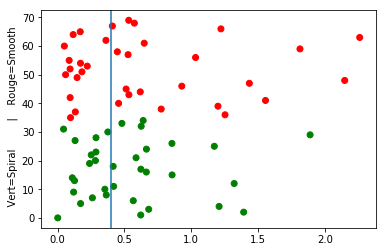

On constate qu'à partir d'un seuil de séparation de 0.4 au niveau du score,
on obtient une sépration des classes. La majorité des éleément de la classe "Smooth"
se trouvent au dessus de 0.4 tandis que ceux de la classe "Spiral", se trouvent
en dessous de 0.4. Quand bien même cette primitive n'est pas idéale, elle reste détient
toutefois un pouvoir disciminant acceptable.


In [80]:
from matplotlib.colors import ListedColormap

colors = np.zeros(len(X_Train_crop_grayScale), dtype = "uint8")
for index,img in enumerate(X_Train_crop_grayScale) : 
    colors[index] = 0 if index < 35 else 1
    
graph = plt.scatter(scores, range(len(scores)), c=colors, cmap=ListedColormap(['green','red']))
plt.axvline(x=0.4)
plt.ylabel("    Vert=Spiral         |    Rouge=Smooth  ")
plt.show()

print("On constate qu'à partir d'un seuil de séparation de 0.4 au niveau du score,\n"+
      "on obtient une sépration des classes. La majorité des éleément de la classe \"Smooth\"\n"+
      "se trouvent au dessus de 0.4 tandis que ceux de la classe \"Spiral\", se trouvent\n"+
      "en dessous de 0.4. Quand bien même cette primitive n'est pas idéale, elle reste détient\n"+
      "toutefois un pouvoir disciminant acceptable.")

### II.2. Deuxième primitive : 


#### II.2.1. Choix de la primitive 
Explication de la primitive

#### II.2.2. Extraction de la primitive

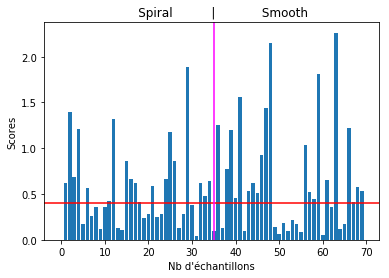

On constate que la majorité des images de la classe "spiral" on un
score inférieur à 0.4. Il s'agirat donc du seuil qui sera utilisé pour
détecter cette classe.


In [81]:
from skimage.feature import local_binary_pattern
from skimage import img_as_float

# Ces constantes servent à définir la méthode utilisée pour le LBP ainsi que la taille des sections
# pour lesquels on va procéder à la comparaison des voisins. Ici, une matrice de 16x16 en raison de
# la faible définition de images (idéalement, une matrice de 3x3 donnerait un résultat plus précis).
METHOD = 'uniform'
radius = 16
n_points = 16 * radius

# Le code source de la fonction "kullback_leibler_divergence" provient de :
# http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_local_binary_pattern.html
# Il s'agit d'une fonction permettant de comparer deux images binaires par leurs historgrames et 
# retourne un ratio de leur divergence (donc un score de 0.0 signifie qu'il n'y a aucune divergence).
# Cette fonction est aussi appelée "L'entropie relative" ou la différence de Kullback-Leibler du nom de
# leurs inventeurs.
def kullback_leibler_divergence(p, q):
    p = np.asarray(p)
    q = np.asarray(q)
    filt = np.logical_and(p != 0, q != 0)
    return np.sum(p[filt] * np.log2(p[filt] / q[filt]))

# On commence par déterminer un histograme de référence (ici, la première image, qui est une spirale).
# Pour se faire on récupère l'image de référence à deux dimensions et on extrait son LBP qui servira à bâtir
# l'histogramme associé grâce à des fonctions des librairies Numpy et Skimage
lbp_ref = local_binary_pattern(X_Train_crop_grayScale[0], n_points, radius, METHOD)
n_bins = int(lbp_ref.max() + 1)
ref_hist, _ = np.histogram(lbp_ref, normed=True, bins=n_bins, range=(0, n_bins))
    
# Pour chaque image d'entrainement, on compare l'histogramme de son LBP avec celui de référence. 
scores = []
for index,img in enumerate(X_Train_crop_grayScale) : 
    
    image = X_Train_crop_grayScale[index]
    
    # On extrait l'histogramme de son LBP.
    lbp = local_binary_pattern(image, n_points, radius, METHOD)
    n_bins = int(lbp_ref.max() + 1)
    hist, _ = np.histogram(lbp, normed=True, bins=n_bins, range=(0, n_bins))
    
    # On évalue son score grâce à la fonction "Kullback-Leibler divergence".
    # Note : plus le score est proche de 0 et plus il y a de similitude.
    score = kullback_leibler_divergence(hist, ref_hist)
    
    scores.append(score)

# On affiche un diagramme en bar afin de mieux visualiser quel serait le bon seuil
# à utiliser.
x_axis = range(len(scores))
plt.bar(x_axis, scores)
plt.axhline(y=0.4,color='red')
plt.axvline(x=35, color='magenta')
plt.title("              Spiral          |            Smooth        ")
plt.xlabel("Nb d'échantillons")
plt.ylabel("Scores")

fig = plt.gcf()

plt.show()

print('On constate que la majorité des images de la classe "spiral" on un\n'+
'score inférieur à 0.4. Il s\'agirat donc du seuil qui sera utilisé pour\n'+
'détecter cette classe.')

#### II.2.3. Evaluation de la première primitive

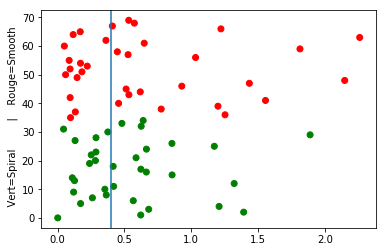

On constate qu'à partir d'un seuil de séparation de 0.4 au niveau du score,
on obtient une sépration des classes. La majorité des éleément de la classe "Smooth"
se trouvent au dessus de 0.4 tandis que ceux de la classe "Spiral", se trouvent
en dessous de 0.4. Quand bien même cette primitive n'est pas idéale, elle reste détient
toutefois un pouvoir disciminant acceptable.


In [82]:
from matplotlib.colors import ListedColormap

colors = np.zeros(len(X_Train_crop_grayScale), dtype = "uint8")
for index,img in enumerate(X_Train_crop_grayScale) : 
    colors[index] = 0 if index < 35 else 1
    
graph = plt.scatter(scores, range(len(scores)), c=colors, cmap=ListedColormap(['green','red']))
plt.axvline(x=0.4)
plt.ylabel("    Vert=Spiral         |    Rouge=Smooth  ")
plt.show()

print("On constate qu'à partir d'un seuil de séparation de 0.4 au niveau du score,\n"+
      "on obtient une sépration des classes. La majorité des éleément de la classe \"Smooth\"\n"+
      "se trouvent au dessus de 0.4 tandis que ceux de la classe \"Spiral\", se trouvent\n"+
      "en dessous de 0.4. Quand bien même cette primitive n'est pas idéale, elle reste détient\n"+
      "toutefois un pouvoir disciminant acceptable.")

### II.3. Troisième primitive : Nombre Points lumineux décentralisés


#### II.3.1. Choix de la primitive 
Nous constatons que les galaxies smooth on une luminosité strictement décroissante au fur et à mesure qu'on s'éloigne du centre. Pourtant les galaxies spiral a une luminausité suivant le spiral. Dans les galaxies spirales on rencontre une alternance de luminosité au fur et à mesure qu'on s'éloigne du centre. Par conséquent cette primitive compte le nombre de pixels plus lumineux que des pixels plus près du centre afin de quantifier cette différence dans ces deux types de galaxies.

#### II.3.2. Extraction de la primitive

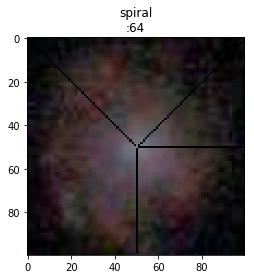

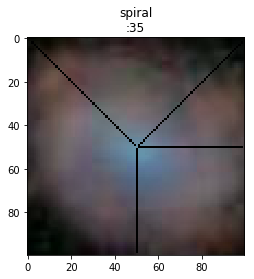

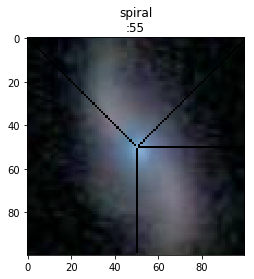

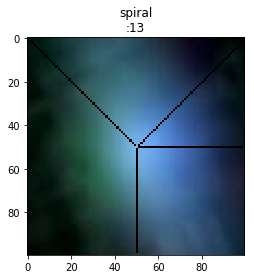

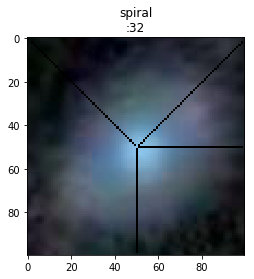

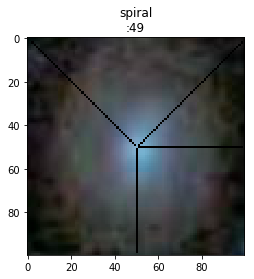

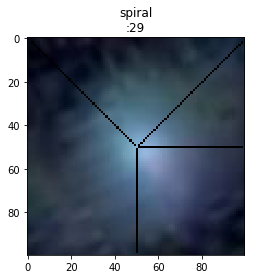

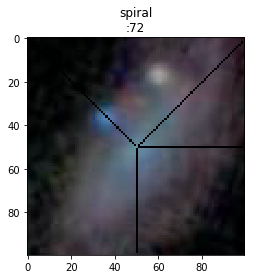

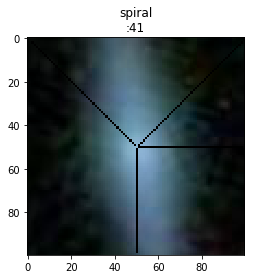

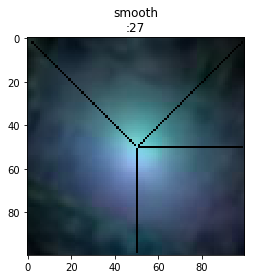

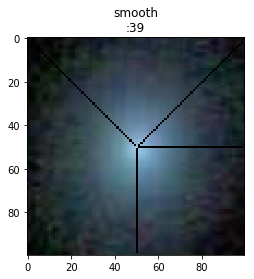

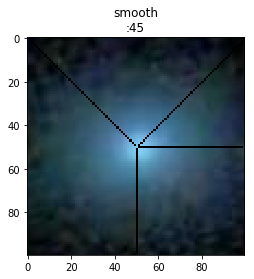

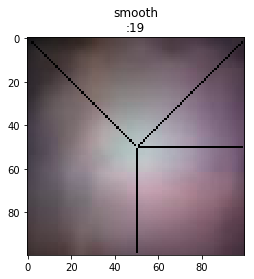

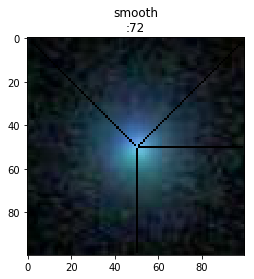

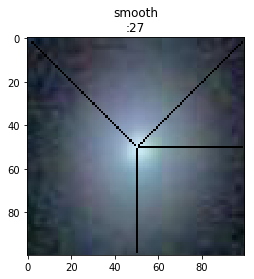

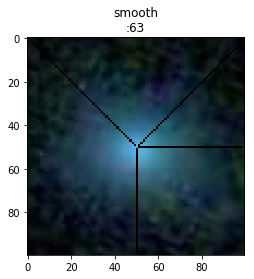

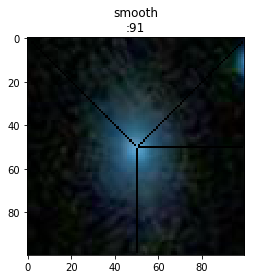

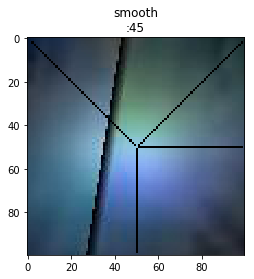

In [83]:
count_data_set = 0
nombre_point_lum_hors_centres = np.zeros(70, dtype="uint8")
nombre_point_lum_hors_centre = 0
images_a_visualiser = np.zeros((70, 100, 100,3))
for element in X_train_crop : 
    image = X_train_crop [count_data_set]
    #Conversion de l'image en grayScale
    image=image.astype(np.float32)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #On considère les pixels (50,50) à (50,100), soit 50 pixels
    centre_y = 50
    centre_x = 50
    nombre_point_lum_hors_centre = 0
    
    #h_d (horizontal->doite)
    decal_hor_droite = centre_x
    centre_lum_min_h_d = gray_image[centre_y][decal_hor_droite]
    
    #d_d (diagonal->doite)
    decal_diag_droite = centre_x
    centre_lum_min_d_d = gray_image[centre_y][decal_diag_droite]
    
    #d_g (diagonal->gauche)
    decal_diag_gauche = centre_x
    centre_lum_min_d_g = gray_image[centre_y][decal_diag_gauche]
    
    #v_b (vertical->bas)
    decal_vert_bas = centre_x
    centre_lum_min_v_b = gray_image[centre_y][decal_vert_bas]
    
    decal = 1
    for j in gray_image :
        #print(str(decal)+" "+str(gray_image[50][decal]))
        #print(gray_image[200][decal])
        
        #extraction horizontal->doite
        decal_hor_droite+=1
        if gray_image[centre_y][decal_hor_droite] >= centre_lum_min_h_d :
            nombre_point_lum_hors_centre+=1
        else : 
            centre_lum_min_h_d = gray_image[centre_y][decal_hor_droite]
        image[centre_y][decal_hor_droite]= 0
        
        #extraction diagonal->droite
        decal_diag_droite+=1
        if gray_image[centre_y-decal][decal_diag_droite] >= centre_lum_min_d_d :
            nombre_point_lum_hors_centre+=1
        else : 
            centre_lum_min_d_d = gray_image[centre_y-decal][decal_diag_droite]
        image[centre_y-decal][decal_diag_droite]= 0
        
        #extraction diagonal->gauche
        decal_diag_gauche-=1
        if gray_image[centre_y-decal][decal_diag_gauche] >= centre_lum_min_d_g :
            nombre_point_lum_hors_centre+=1
        else : 
            centre_lum_min_d_g = gray_image[centre_y-decal][decal_diag_gauche]
        image[centre_y-decal][decal_diag_gauche]= 0
        
        #extraction vertical->bas
        #decal_vert_bas+=1
        if gray_image[centre_y+decal][decal_vert_bas] >= centre_lum_min_v_b :
            nombre_point_lum_hors_centre+=1
        else : 
            centre_lum_min_v_b = gray_image[centre_y+decal][decal_vert_bas]
        image[centre_y+decal][decal_vert_bas]= 0
        
    
        decal+=1
        if decal == 49 : 
            break

    #print(nombre_point_lum_hors_centre)
    nombre_point_lum_hors_centres[count_data_set] = nombre_point_lum_hors_centre
    images_a_visualiser[count_data_set] = image
    count_data_set+=1

#Visualisation de la procedure d'extraction
count_data_set = 0
for i in images_a_visualiser : 
    image = images_a_visualiser[count_data_set]
    plt.imshow(image/255)
    plt.title(""+str(Y_train[count_data_set])+":"+str(nombre_point_lum_hors_centres[count_data_set]))
    plt.show()
    #affichage de chaque 6 images
    count_data_set+=4
    if(count_data_set) >= images_a_visualiser.shape[0] :
        break

#### II.3.3. Evaluation de la primitive

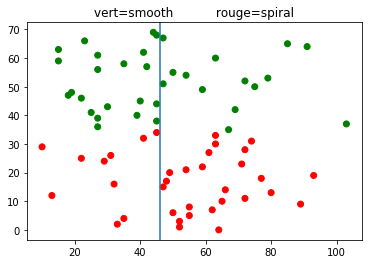

Pour un seuil de séparation de 46
Nous constatons que les smooth (vert) sont majoritairement à gauche 
Et les spirales (rouge), majoritairement à droite


In [84]:
from matplotlib.colors import ListedColormap
from random import randint

colors = ['green','red']
cm_bright = ListedColormap(colors)

# Pour dispercer les point suivant l'axe y (eviter la superposition) etant donner que c'est un seul attribut à visualiser
y = np.zeros(70, dtype = "uint8")
j=0
for i in y :
    y[j] = j
    j+=1
    
#Transformation de l'attribut cible en numerique
Y_train_2 = np.zeros(70, dtype = "uint8")
v_index = 0
for i in Y_train : 
    if "smooth" in Y_train[v_index]:
        Y_train_2[v_index] = 0
    else :
        Y_train_2[v_index] = 1
    v_index+=1
    
#Africhage des valeurs de la primitives et des valeurs y utiliser pour les dispercer (eviter la superposition)
#print(nombre_point_lum_hors_centres)
#print("==================================")
#print(y)
#print("==================================")
#print (Y_train)
#print (Y_train_2)

#Visualisation du pouvoir discriminant de la primitive
graph = plt.scatter(nombre_point_lum_hors_centres, y, c=Y_train_2, cmap=cm_bright)
xc =  46
plt.axvline(x=xc)
plt.title ("vert=smooth           rouge=spiral")
plt.show()
print("Pour un seuil de séparation de 46")
print("Nous constatons que les smooth (vert) sont majoritairement à gauche ")
print("Et les spirales (rouge), majoritairement à droite")


#### II.4. Visualisation de deux primitives
À l’aide de graphiques générés par votre script, expliquez l’efficacité de deux primitives qui permettent de bien distinguer les classes du problème.


## III. Implémentation et analyse de l’arbre de décision


### III.1. Implémentation de l’arbre de décision

### III.2. Analyse des performances du modèle

À la suite de votre implémentation de l’arbre de décision, expliquer pour quelles raisons votre arbre de décision donne un tel score de précision. Qu’a fait la variable max_depth sur les performances de classification?Comment l’arbre de décision réagit-il au bruit?

### III.3. Proposition d'améliorations possibles

Quelle autre primitive aurait également pu être ajoutée afin d’améliorer le pouvoir discriminant ou la performance de régression des probabilités?

## Conclusion

Écrivez une conclusion qui résume le contenu de votre rapport. Dites, enrésumé, la manière dont vous avez résolu le problème,quelles ont été vos primitives et les résultats que vous avez obtenus, et glissez un mot sur des améliorations possibles. Dites également, le cas échéant, ce qui a moins bien été durant la réalisation de ce laboratoire.